   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50

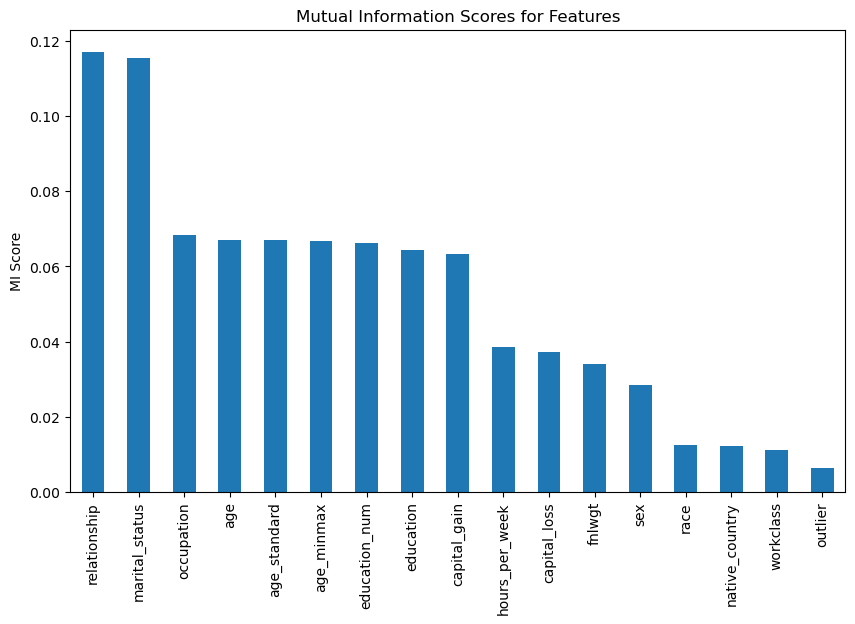

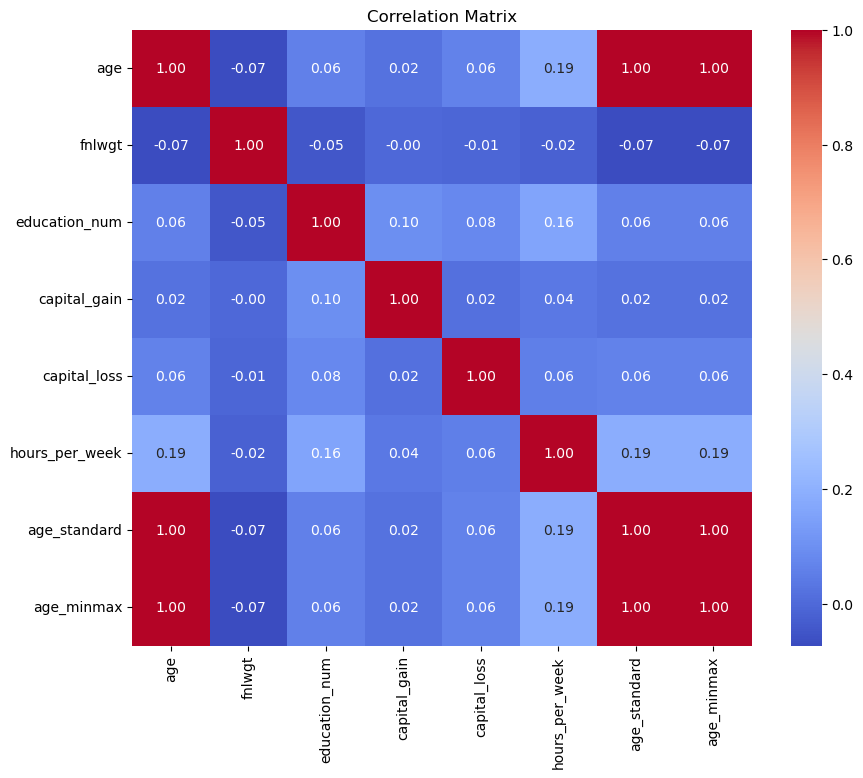

In [7]:
#1. Data Exploration and Preprocessing
#1.1 Load the Dataset and Conduct Basic Data Exploration
import pandas as pd
df = pd.read_csv(r"C:\Users\hp\Downloads\EDA2\EDA2\adult_with_headers.csv")

# Basic data exploration
print(df.head())               # First 5 rows
print(df.info())               # Data types and non-null counts
print(df.describe())           # Summary statistics for numerical columns
print(df.isnull().sum())       # Check for missing values

#1.3 Scaling Techniques for Numerical Features
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define the scaler objects
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Apply standard scaling
df['age_standard'] = scaler_standard.fit_transform(df[['age']])

# Apply min-max scaling
df['age_minmax'] = scaler_minmax.fit_transform(df[['age']])

# Show the results
print(df[['age', 'age_standard', 'age_minmax']].head())

#2. Encoding Techniques
df
df_onehot = pd.get_dummies(df, columns=['workclass', 'occupation', 'marital_status'])
print(df_onehot.head())
#2.2 Label Encoding for Categorical Variables with More Than 5 Categories
colname = []
for x in df.columns:
    if df[x].dtypes =='object':
        colname.append(x)
colname
# processing the df
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in colname:
    df[x]=le.fit_transform(df[x])
    le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
    print('Feature',x)
    print('mapping',le_name_mapping)

# Apply log transformation to 'capital-gain' (if it's skewed)
import numpy as np
df['capital_gain'] = np.log1p(df['occupation'])

# Check if the transformation helped reduce skew
df[['capital_gain', 'occupation']].describe()

from sklearn.ensemble import IsolationForest

# Train Isolation Forest model
iso_forest = IsolationForest(contamination=0.05)  # Set contamination based on the dataset size
outliers = iso_forest.fit_predict(df[['age', 'hours_per_week', 'capital_gain']])

# Mark outliers as -1, normal data as 1
df['outlier'] = outliers
df = df[df['outlier'] == 1]  # Remove outliers

# Check remaining data
print(df.shape)
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'income' is the target column
X = df.drop('income', axis=1)
y = df['income']

# 1. Mutual Information
mi_scores = mutual_info_classif(X, y, discrete_features='auto')
mi_scores_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print("Mutual Information Scores:")
print(mi_scores_series)

# Plot MI Scores
plt.figure(figsize=(10, 6))
mi_scores_series.plot(kind='bar')
plt.title("Mutual Information Scores for Features")
plt.ylabel("MI Score")
plt.show()

# 2. Correlation Matrix (only for numerical features)
numeric_features = X.select_dtypes(include=['int64', 'float64'])

correlation = numeric_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()
